<div style="background: black; padding: 10px 250px"><img src="https://www.veldikompetens.se/wp-content/themes/consid/static/icons/VeldiKompetens_Logo_Web_Negative.svg" title="Veldi kompetens" /></div>

<hr><h1><center>Exercise 2b - Images in Jupyter Notebook</center>

<h3>Instructions </h3>

<p>In this exercise you will learn how to open images in jupyter notebook using matplotlib and opencv. You will learn two different approaches, either using a downloaded image and placing it in a folder, or using a url to send a request to access the image. </p>

<h3> 1. Setup </h3>

<p> Go through the setup steps below to ensure you have what you need for the exercise</p>
<ul>
    <li>A working installation of matplotlib and openCV (cv2) in your conda environment (Needed for section 2. Instructions in 1.1)</li>
    <li>Have access to an image via an url (Check section 1.2)</li>
    <li>Have access to an image file in the same directory as the notebook (Check section 1.2)</li>
    <li>Have access to an image file in another directory on your computer (Check section 1.2)</li>
</ul>


<h4> 1.1: Installing packages </h4>
To install cv2 into your anaconda environment. Follow the below steps:
<ul>
    <li> Open Anaconda Prompt </li>
    <li> Run the command: conda install opencv </li>
</ul>
Matplotlib should already be installed, but if it is not you can run the following:
<ul>
    <li>conda install matplotlib</li>
</ul>

<h4>1.2: Setting up access ways</h4>
Next up we will create three different ways of accessing an img file. URL, Remote path or locally. You can keep the URL if you want to but you will definitley need to change the REMOTE and LOCAL variables.

In [2]:
IMG_URL = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg" # TODO Change this to desired url for an img
REMOTE_IMG_PATH = "C:/Users/clandst1/OneDrive - Volvo Cars/Desktop/Jupyter Notebook Proj/Py2b_christoffer_landstrom/week2/dog-2126708__340.jpg" #TODO path to img file in a remote directory, this is my img in remote folder
LOCAL_IMG_NAME = "dog-2126708__340.jpg" #TODO Name of the img file in the same dir as the notebook, this is mine

<h3>2. Exercise 2b - Images in Jupyter Notebook</h3>

<h4> 2.1: Importing Libraries </h4>
<p>Run the code cell below to import the neccesary libraries</p>

In [3]:
# Neccesary libraries
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from urllib.request import urlopen, Request

<p>Note: the %matplotlib inline is a magical function which we recommend reading up on. In short it allows you to render plots and figures inside of the notebook instead of opening a seperate window for it.</p>

<h4> 2.2: Accessing the local img </h4>
IMPORTANT: You need to have a valid path to an img to run and show the img.

In [12]:
def img_via_local():
    BGR_IMG = cv2.imread(LOCAL_IMG_NAME) 
    RGB_IMG = cv2.cvtColor(BGR_IMG, cv2.COLOR_BGR2RGB)
    
    return RGB_IMG

(340, 340, 3)
3


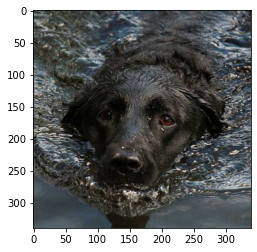

In [13]:
img = img_via_local()
plt.imshow(img)

print(img.shape)
print(img.ndim)

Example output of my image:
<img src="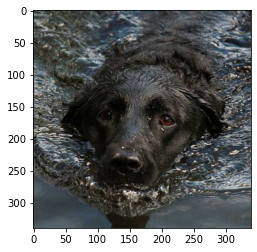
">

<p>Note: </p>
<ul>
    <li>cv2.imread reads the image in BGR (Blue, Green, Red) color pattern, however, Matplotlib operates with the RGB color
        pattern. Thus when loading images with cv2 we need to change the colors around </li>
    <li>For acessing a file locally we only need the name of the file</li>
    <li>The x and y axises shows the dimensions of the picture</li>
    <li>Each img loaded is basically a numpy array! Check it out with the .shape command! For example; img.shape. The two first
        values are the x and y dimensions respectivley, the third one corresponds to the color pattern (RGB)</li>
</ul>

<h4> 2.3: Accessing an img in a remote directory </h4>
Notice that the only real difference in code here is that we need to use the variable REMOTE_IMG_PATH as we need to tell python where to find the image

In [14]:
def img_via_remote():
    BGR_IMG = cv2.imread(REMOTE_IMG_PATH) 
    RGB_IMG = cv2.cvtColor(BGR_IMG, cv2.COLOR_BGR2RGB)
    
    return RGB_IMG


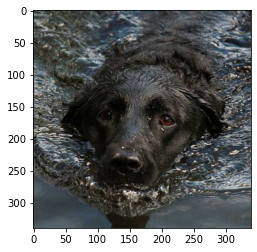

In [15]:
img = img_via_remote()
plt.imshow(img)

<h4> 2.4: Accesing an img via url </h4>
Let's try something a bit more complicated. Below you can find an example of fetching an image online, loading it into a numpy array then displaying it as a RGB image.

In [16]:
# Web Approach

def img_via_url():
    # Returns a Numpy Array with RGB colors
    URL = IMG_URL
    HEADER = {'User-Agent': 'Mozilla/5.0'} 
    
    with urlopen(URL) as req:
        img_array = np.asarray(bytearray(req.read()), dtype=np.uint8)
        BGR_img = cv2.imdecode(img_array, -1) 
        
    RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
        
    return RGB_img

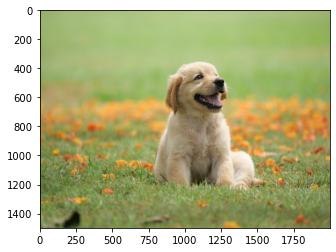

In [17]:
img = img_via_url()

plt.imshow(img)

<p>Awesome! To walk you through a bit how the code works, here is some info:</p>

<ul>
    <li>HEADER is a variable that basically tells the site we are visiting that we are not a scary robot and using a "browser", which isnt really true. Optional reading on the subject of headers and they are not mandatory but a good practice.</li>
    <li>The with statement is used when you want to access things like files or use connections, you can think of it like a try and catch. It handles a lot of issues for you and is a good practice to use. Google with statement and Context Manager to learn more!:)</li>
    <li>urlopen sends a request to a website to access its content. If it gets a response you get back basically a packet of information </li>
    <li>The next two lines are a bit of magic, the request is in bytes and need to first be read to be manipulated. We then transform this read information into a numpy array with the imdecode functionality </li>
    <li>Finally we decode the image perform the neccessary operations to get the regular color scheme </li>
    
</ul>

<h4>2.5: Closing remarks</h4>

Great job! Make sure you understand most of the code above. Try changing around the folders, using new addresses etc. Images are very common in data analysis and is definitley something you want to master before proceeding on. Some things you can try out are:
<ul>
    <li> Having a folder of just images, loop through it and render them all</li>
    <li> Have more than just one url that you want to load an image from </li>
</ul>